In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set()
import datetime
from sklearn import datasets

# Let's import the Iris dataset

In [2]:
dataset = datasets.load_iris()
x = dataset.data
y = dataset.target

labels = ['Iris-setosa', 'Iris-versicolour', 'Iris-virginica']

labels

['Iris-setosa', 'Iris-versicolour', 'Iris-virginica']

# Now let's find the best number of clusters

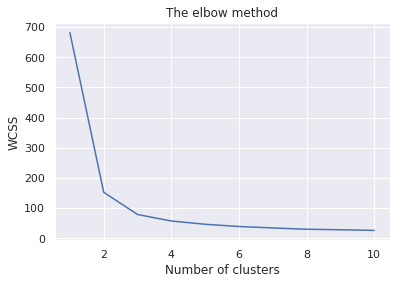

In [3]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

# Now, let's use K-Means to predict the labels

In [4]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualizing the clusters

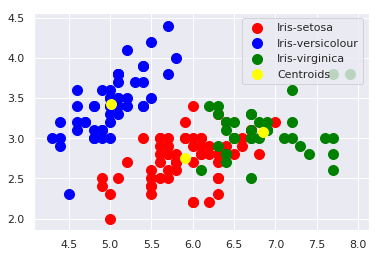

In [5]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# Let's evaluate a little bit 

2020-05-12 00:03:42.524890: KMeans Testing accuracy = 0.24000


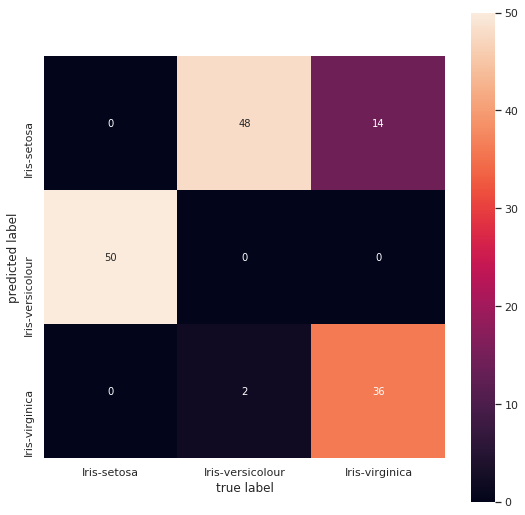

In [6]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
matrixKMeans = confusion_matrix(y, y_kmeans)

plt.subplots(figsize=(9,9))
sns.heatmap(matrixKMeans.T, square=True, annot=True, fmt='d',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

accuracyKMeans = metrics.accuracy_score(y, y_kmeans)

print(str(datetime.datetime.now()) +
      ': KMeans Testing accuracy = %.5f' % accuracyKMeans)